# Esperimento Tubo 

## Importo Le Librerie

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox
from pprint import pprint

##Fit Lineare

### Importo I Dati

In [67]:
modo =          [1, 2, 3, 4, 5, 6, 7, 8, 9]
lunghezza_tubo = 0.9894 + 0.058 # m
lunghezza_tubo_err = 0.0005 # m
massimo =       [162, 64, 20, 19.60, 26.80, 28.80, 10.84, 11.28, 7.619] # mV
peak_to_peak =  [324, 136, 40.40, 39.20, 53.60, 57.20, 22.13, 23.22, 15.55] # mV
frequenza =     [165, 330, 495, 660, 825, 990, 1155, 1320, 1485] # Hz
frequenza_err = [0.3] * 9 # Hz
periodo =       [6.064, 3.024, 2.014, 1.512, 1.211, 1.006, 0.8659, 0.7551, 0.6719] # ms

### carico i dati su un file

In [14]:
with open("dati_armoniche.txt", "a") as f:
  row = ""
  for index in range(len(modo)):
    # modo + frequenza + ampiezza + periodo
    row += str(modo[index]) + "\t" + str(round(frequenza[index], 6)) + "\t" + str(round(peak_to_peak[index] * (10**(-3)), 6)) + "\t" + str(round(periodo[index] * (10 ** (-3)), 6)) + "\n"
  f.write(row)

In [81]:
k = []
k_err = []
w = []
w_err = []

for index in range(len(modo)):
  current_k = (modo[index] * np.pi) / lunghezza_tubo
  current_k_err = (lunghezza_tubo_err / lunghezza_tubo) * current_k
  k.append(current_k)
  k_err.append(current_k_err)

for index in range(len(modo)):
  current_w = (2 * np.pi) * frequenza[index]
  current_w_err = (0.3 / frequenza[index]) * current_w
  w.append(current_w)
  w_err.append(current_w_err)
  # print(f"frequenza: {frequenza[index]}\n w: {current_w} \n {current_w_err}")

pprint(k)
pprint(w)


[2.9994201390011392,
 5.9988402780022785,
 8.998260417003419,
 11.997680556004557,
 14.997100695005697,
 17.996520834006837,
 20.995940973007976,
 23.995361112009114,
 26.994781251010256]
[1036.7255756846316,
 2073.4511513692632,
 3110.1767270538953,
 4146.9023027385265,
 5183.627878423159,
 6220.353454107791,
 7257.079029792422,
 8293.804605477053,
 9330.530181161686]


### Plot Dei Dati

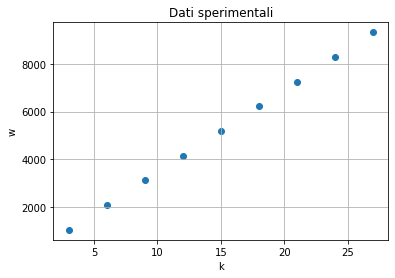

In [69]:
y=np.array(w)
x=np.array(k)
y_err = np.array(w_err)
x_err = np.array(k_err)

plt.figure()
plt.title("Dati sperimentali")
plt.xlabel("k")
plt.ylabel("w")
plt.grid()
_=plt.scatter(x,y)

### Fit Dei Dati

In [70]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

In [71]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(A, B, print_output=True):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 

  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, x, y, p0=guess, bounds=bounds)

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=x_err, yerr=y_err)
  plt.scatter(x,y, s=25, c = "c", label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color= "m" ,label="Fit",linewidth=1)
  plt.xlabel("K")
  plt.ylabel("w")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  
  if print_output:
    label = ["velocità suono", "intercetta"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v, e))
    print("\n")  

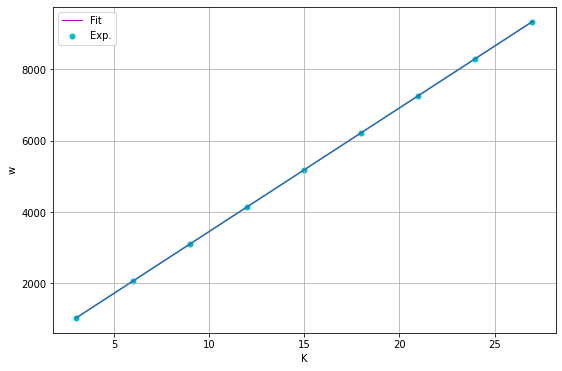

         A = 345.641999 +- 0.000000
         B =  0.000016 +- 0.000002




In [72]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0,0)

In [82]:
# errore suono
(0.0014318408148754724/2.9994201390011392) + (1.8849555921538756/1036.7255756846316)* 345.68

0.6289864634506224

## Fit gne

### Importo I Dati

In [84]:
modo = [1, 2, 3]

frequenza = {
    "modo-1": 
    [
            1,
            5,
            10,
            15,
            20,
            25,
            35,
            45,
            60,
            55,
            60,
            70,
            80,
            100,
            110,
            115,
            120,
            130, 
            135,
            140,
            145,
            147,
            150,
            152.5,
            156,
            157,
            158,
            159,
            160,
            161,
            162,
            163,
            163.5,
            164,
            164.5,
            165,
            165.5,
            166,
            166.5,
            167,
            168,
            169,
            170,
            171,
            172,
            173,
            174,
            175,
            176,
            177,
            178,
            179, 
            180,
            185,
            190,
            195, 
            200,                                      
]}

ampiezza = {
    "modo-1": [
               4,
               4,
               4,
               4,
               4,
               8,
               12,
               24,
               28,
               36,
               40,
               48,
               52,
               56,
               60,
               64,
               80,
               84,
               96,
               104,
               116,
               124,
               140,
               156,
               180,
               192,
               204,
               212,
               228,
               240,
               260,
               276,
               284,
               296,
               308,
               316,
               332,
               344,
               360,
               376,
               408,
               448,
               484,
               520,
               556,
               576,
               572,
               504,
               500,
               468,
               444,
               424,
               362,
               280,
               208,
               160,
               128
    ]
}

### Carico Dati

In [92]:
with open("dati_ampiezza_modo_1.txt", "w") as f:
  row = ""
  for index in range(len(frequenza["modo-1"])):
    row += str(frequenza["modo-1"][index]) + "\t" + str(round(ampiezza["modo-1"][index] * (10**(-3)), 4  )) + "\n"
  f.write(row)

# print(len(frequenza["modo-1"]))

### Plot Dei Dati

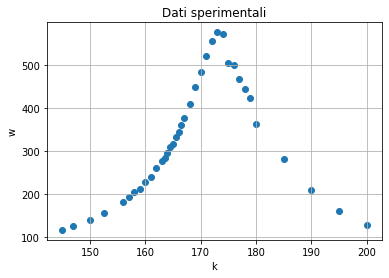

In [98]:
x=np.array(frequenza["modo-1"][20:])
y=np.array(ampiezza["modo-1"][20:])
#y_err = np.array(w_err)
#x_err = np.array(k_err)

plt.figure()
plt.title("Dati sperimentali")
plt.xlabel("k")
plt.ylabel("w")
plt.grid()
_=plt.scatter(x,y)